# Neural Networks and Convultional Neural Networks
## By Emma Corbett
## Fall 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

# Neural Network from the scratch


In [2]:
np.random.seed(0) 
weights = {
'W1': np.random.randn(3, 2),
'b1': np.zeros(3),
'W2': np.random.randn(3),
'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [3]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [4]:
#forward pass - Z2 and Y
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation

    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
   
    Z2 = np.dot(H, weights['W2'].T)  + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [5]:
#backward pass - dLdZ1, dLdW1, dLdb1
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]

    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))

    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)

    ones = np.ones((1000))
    dLdb2 = np.dot(ones.T, dLdZ2)
    dLdH = np.dot(dLdZ2.reshape(-1,1), weights['W2'].reshape(-1,1).T)

    dLdZ1 = np.multiply(dLdH, (sigmoid(Z1)*(1-sigmoid(Z1))))
    dLdW1 = np.dot(X.T, dLdZ1)
    dLdb1 = np.dot(ones.T, dLdZ1)

    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }

    return gradients, L

In [6]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [7]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596, -0.00030765, -0.00034768],
       [ 0.00262019, -0.00024188, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


# Neural network to classify images: CIFAR-10

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

The train/test split is 50k/10k.

In [8]:
import tensorflow
from tensorflow import keras
from keras.datasets import cifar10

In [9]:
#from tensorflow.keras.datasets import cifar10 
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

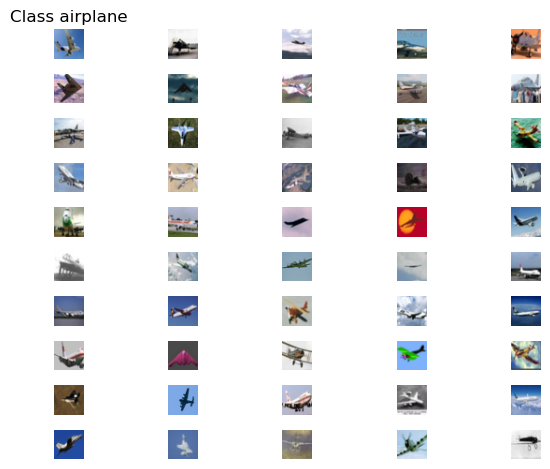

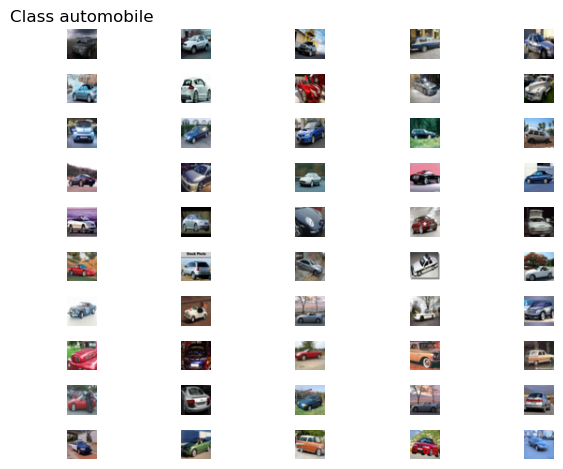

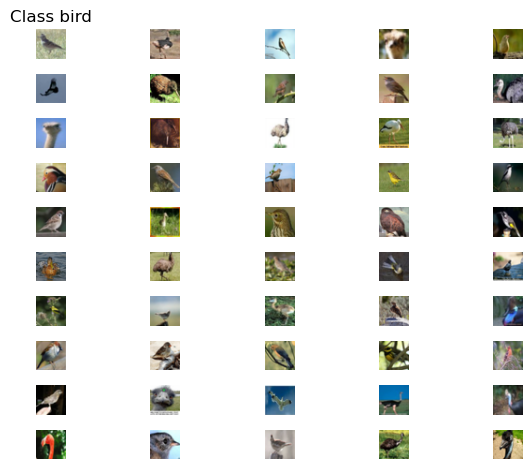

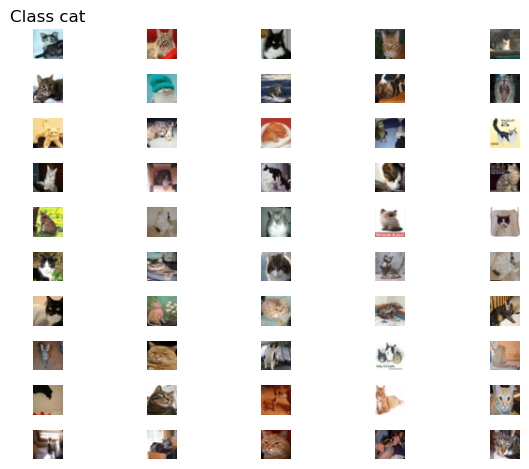

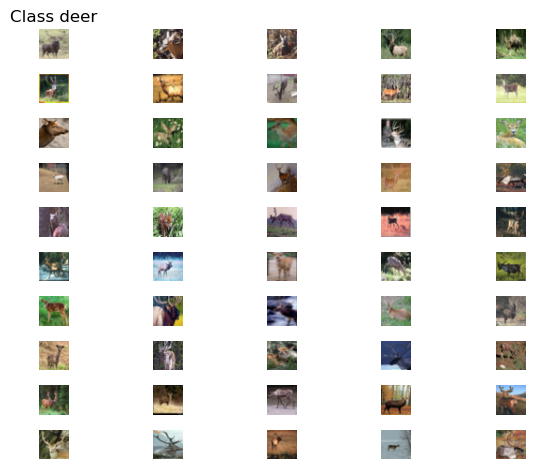

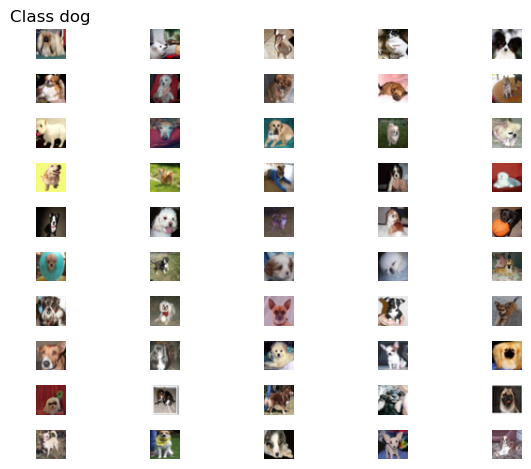

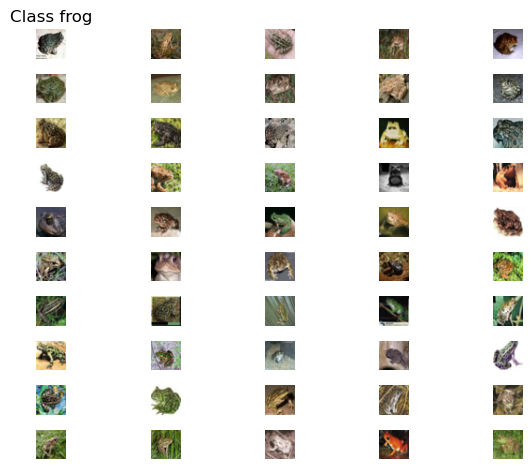

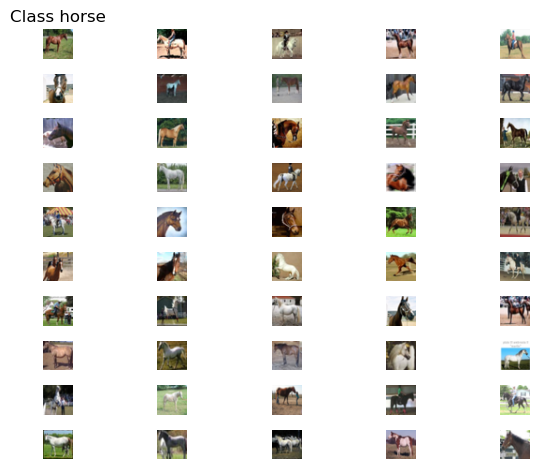

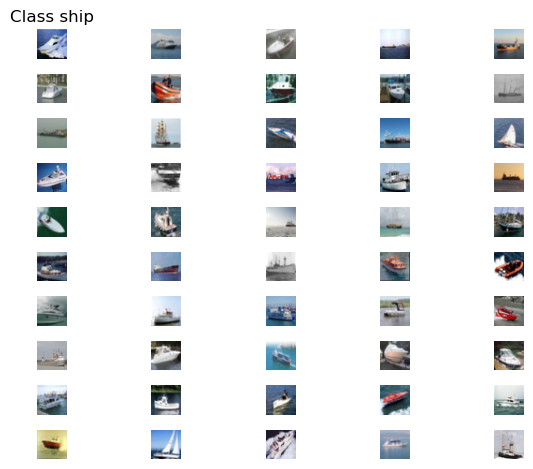

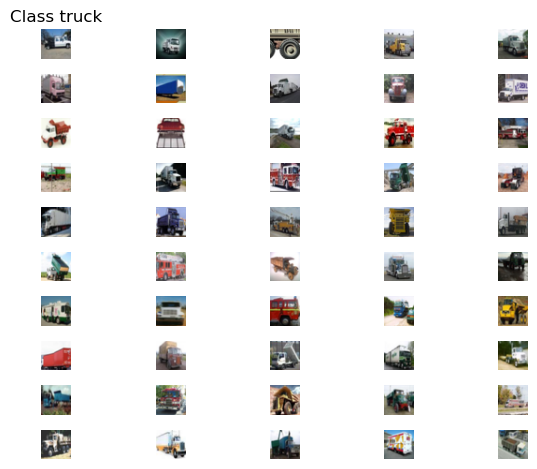

In [10]:
# plot sample of dataset
for label in range(len(LABELS)):
    # get indices of cur class 
    class_indices = np.where(y_dev == label)[0]
    selected_indices = np.random.choice(class_indices, 50, replace=False)
        
    # Plot 50 images of the current class on a 10x5 subplot
    for i, img in enumerate(selected_indices):
        plt.subplot(10, 5, i+1)
        plt.imshow(x_dev[img])
        plt.axis('off')
        if i == 0:
            plt.title(f'Class {LABELS[label]}')

    plt.tight_layout()
    plt.show()

In [11]:
# print shape of dataset
print("xdev shape: ", x_dev.shape)
print("ydev shape: ", y_dev.shape)
print("xtest shape: ", x_test.shape)
print("ytest shape: ", y_test.shape)

xdev shape:  (50000, 32, 32, 3)
ydev shape:  (50000, 1)
xtest shape:  (10000, 32, 32, 3)
ytest shape:  (10000, 1)


In [12]:
# flatten dataset
x_dev_flattened = x_dev.reshape(x_dev.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

print("xdev flattened shape: ", x_dev_flattened.shape)
print("xtest flattened shape: ", x_test_flattened.shape)

xdev flattened shape:  (50000, 3072)
xtest flattened shape:  (10000, 3072)


In [13]:
# standardize data
x_dev_standardized = x_dev_flattened / 255.0
x_test_standardized = x_test_flattened / 255.0

In [14]:
# one hot encode data
encoder = OneHotEncoder(sparse_output=False)
y_dev_encoded = encoder.fit_transform(y_dev.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

In [15]:
# train test split 
X_train, X_val, y_train, y_val = train_test_split(x_dev_standardized, y_dev_encoded, test_size=0.2, random_state=42)

The following is a feed forward neural network with the first layer size set to 128 and hidden later size to be 64.

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
    Dense(128, activation='relu', input_shape=(3072,)),
    Dense(64, activation='relu'),
    # last layer is size 10 for the 10 possible labels
    Dense(10, activation='softmax')
])


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile()
output = model.predict(X_train[0].reshape(1,-1))

print("Output: {:.2f}".format(sum(output[0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Output: 1.00


In [19]:
# Using Adam as optimizer, categorical crossentropty for loss function, and accuracy for metric
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2540 - loss: 2.0655 - val_accuracy: 0.3523 - val_loss: 1.8131
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3646 - loss: 1.7846 - val_accuracy: 0.3795 - val_loss: 1.7375
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3961 - loss: 1.6983 - val_accuracy: 0.3953 - val_loss: 1.6913
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4096 - loss: 1.6488 - val_accuracy: 0.4179 - val_loss: 1.6241
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4288 - loss: 1.5937 - val_accuracy: 0.4165 - val_loss: 1.6397
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4394 - loss: 1.5661 - val_accuracy: 0.4386 - val_loss: 1.5763
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4579 - loss: 1.5344 - val_accuracy: 0.4227 - val_loss: 1.6229
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4583 - loss: 1.5200 - val_accuracy: 0.

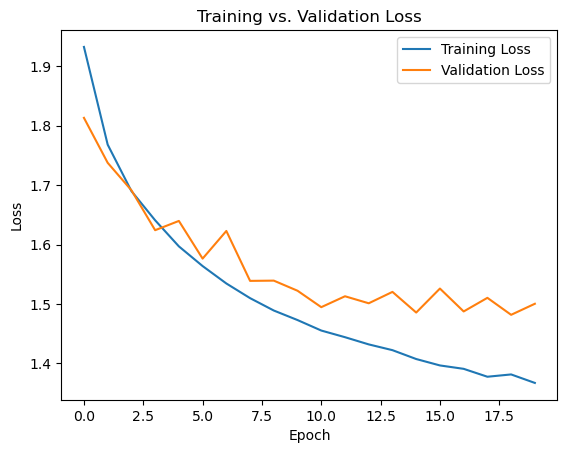

In [20]:
# Plot loss over training epochs 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

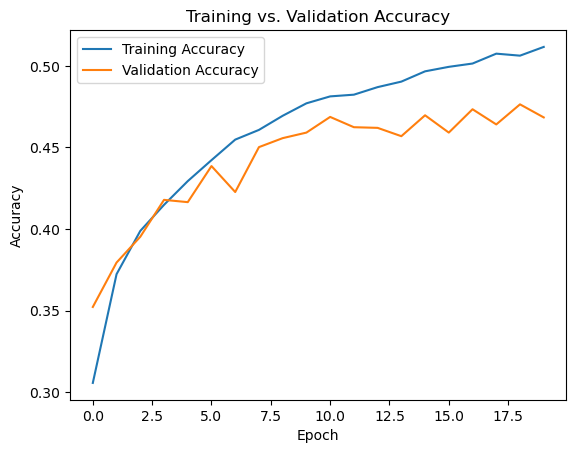

In [21]:
# Plot accuracy over training epochs 
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()

In [22]:
test_loss, test_accuracy = model.evaluate(x_test_standardized, y_test_encoded)
print("Test accuracy is: ", test_accuracy)
print("Test loss is: ", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.4759 - loss: 1.4826
Test accuracy is:  0.4767000079154968
Test loss is:  1.4850177764892578


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


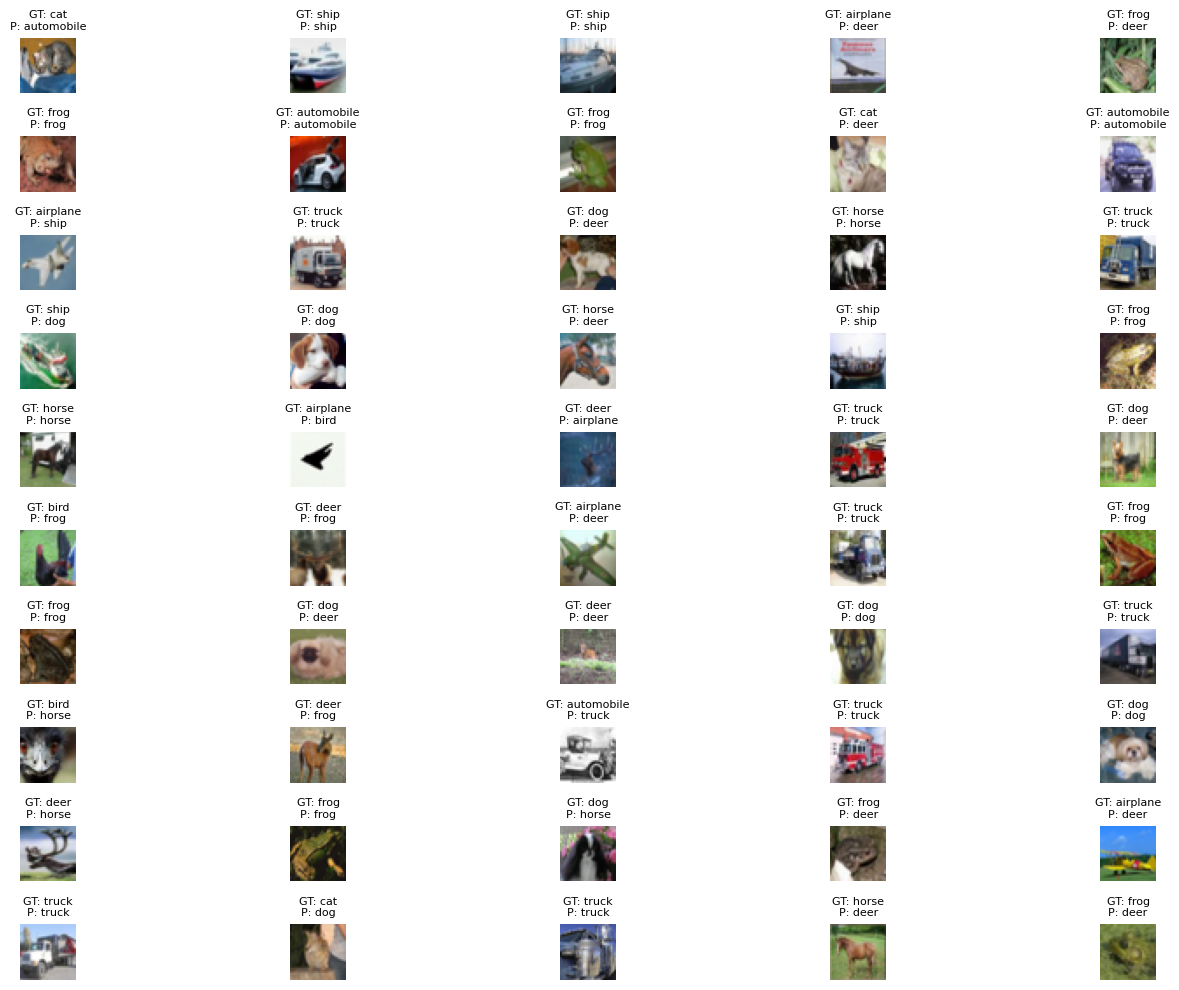

In [23]:
# Plot first 50 predicted samples for validation 
x_test_samples = x_test_standardized[:50]
y_test_samples = y_test[:50].flatten()

# first 50 samples 
y_pred_samples = np.argmax(model.predict(x_test_samples), axis=1)

plt.figure(figsize=(15, 10))
for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')
    
    gt_label = LABELS[y_test_samples[i]]
    pred_label = LABELS[y_pred_samples[i]]
    
    # ground truth (GT) and predicted class (P)
    plt.title(f"GT: {gt_label}\nP: {pred_label}", fontsize=8)

plt.tight_layout()
plt.show()

# Convolutional Neural Networks

In [24]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import pandas as pd
from keras.utils import to_categorical
from keras.datasets import cifar10

In [25]:
# laod dataset
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

cnn_encoder = OneHotEncoder(sparse_output=False)
y_dev_encoded = encoder.fit_transform(y_dev.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev_encoded,test_size = 0.2, random_state = 42)

x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


### Implementing a CNN (LeNet-5) with the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 and padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) Flatten the convolution output to feed it into fully connected layers

6) A fully connected layer with 120 units, ReLU activation

7) A fully connected layer with 84 units, ReLU activation

8) The output layer where each unit respresents the probability of image being in that category

In [26]:
cnn_model = Sequential([
    # conv, layer 1
    Conv2D(6, kernel_size=(5, 5), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
    # max pool, layer 2
    MaxPool2D(pool_size=(2, 2)),
    # conv, layer 3
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    # max pool, layer 4
    MaxPool2D(pool_size=(2, 2)),
    # flatten, layer 5 
    Flatten(),
    # fully connected, layer 6
    Dense(120, activation='relu'),
    # fully connected, layer 7
    Dense(84, activation='relu'),
    # final output layer 8, using softmax acitivation function 
    Dense(10, activation='softmax')
])

In [27]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [28]:
cnn_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.2834 - loss: 1.9606 - val_accuracy: 0.4432 - val_loss: 1.5195
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.4635 - loss: 1.4813 - val_accuracy: 0.4760 - val_loss: 1.4569
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5175 - loss: 1.3500 - val_accuracy: 0.5112 - val_loss: 1.3767
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5504 - loss: 1.2566 - val_accuracy: 0.5577 - val_loss: 1.2456
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5798 - loss: 1.1795 - val_accuracy: 0.5580 - val_loss: 1.2436
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6006 - loss: 1.1191 - val_accuracy: 0.5876 - val_loss: 1.1568
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6271 - loss: 1.0504 - val_accuracy: 0.6051 - val_loss: 1.1249
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6369 - loss: 1.0187 - val_accu

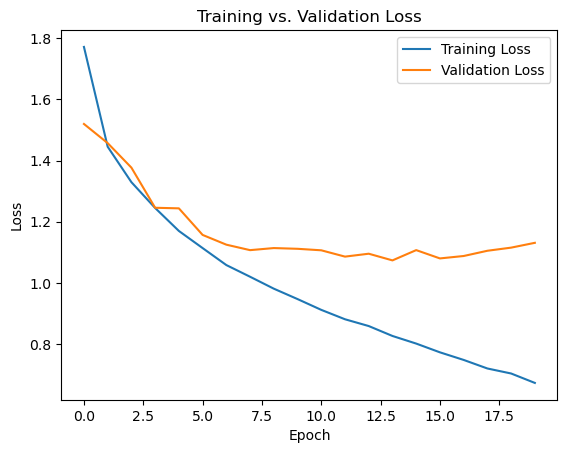

In [29]:
# plot loss over epochs 
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

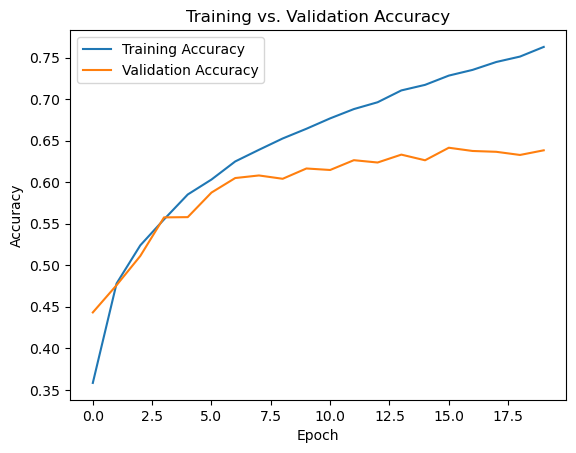

In [30]:
# plot accuracy over epochs
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()

In [31]:
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6419 - loss: 1.1073
Test Accuracy: 63.71%


### Dealing with Overfitting

#### Dropout

In [32]:
cnn_model_dropout = Sequential([
    # conv, layer 1
    Conv2D(6, kernel_size=(5, 5), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
    Dropout(0.3),
    # max pool, layer 2
    MaxPool2D(pool_size=(2, 2)),
    # conv, layer 3
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    Dropout(0.3),
    # max pool, layer 4
    MaxPool2D(pool_size=(2, 2)),
    # flatten, layer 5 
    Flatten(),
    # fully connected, layer 6
    Dense(120, activation='relu'),
    Dropout(0.3),
    # fully connected, layer 7
    Dense(84, activation='relu'),
    Dropout(0.3),
    # final output layer 8, using softmax acitivation function 
    Dense(10, activation='softmax')
])

cnn_model_dropout.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

cnn_dropout_history = cnn_model_dropout.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.2353 - loss: 2.0482 - val_accuracy: 0.4113 - val_loss: 1.7397
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.4089 - loss: 1.6101 - val_accuracy: 0.4861 - val_loss: 1.5428
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4617 - loss: 1.4845 - val_accuracy: 0.4864 - val_loss: 1.4763
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4878 - loss: 1.4170 - val_accuracy: 0.5320 - val_loss: 1.4401
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5091 - loss: 1.3638 - val_accuracy: 0.5465 - val_loss: 1.3752
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5263 - loss: 1.3257 - val_accuracy: 0.5422 - val_loss: 1.3767
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5445 - loss: 1.2861 - val_accuracy: 0.5496 - val_loss: 1.3540
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5566 - loss: 1.2515 - val_accu

In [33]:
test_loss_dropout, test_accuracy_dropout = cnn_model_dropout.evaluate(x_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy_dropout * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6114 - loss: 1.1148
Test Accuracy: 61.29%


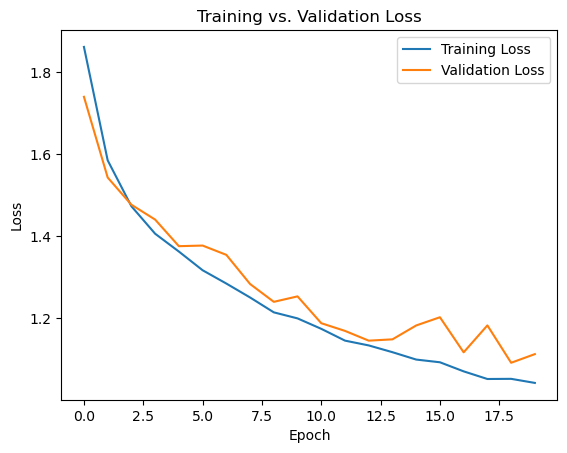

In [34]:
plt.plot(cnn_dropout_history.history['loss'], label='Training Loss')
plt.plot(cnn_dropout_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

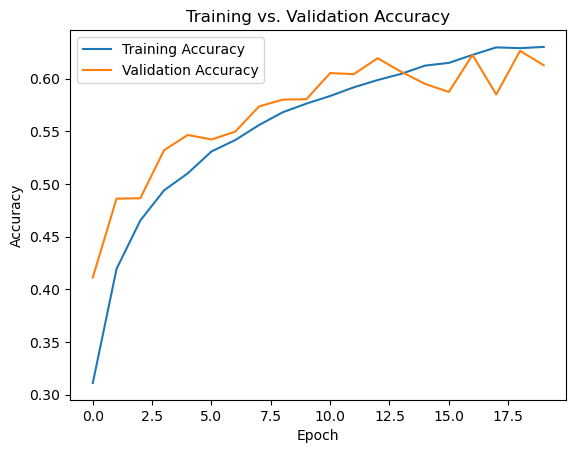

In [35]:
plt.plot(cnn_dropout_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_dropout_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()

#### Batch Normalization

In [36]:
cnn_model_batchnorm = Sequential([
    # conv, layer 1
    Conv2D(6, kernel_size=(5, 5), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    # max pool, layer 2
    MaxPool2D(pool_size=(2, 2)),
    # conv, layer 3
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    BatchNormalization(),
    # max pool, layer 4
    MaxPool2D(pool_size=(2, 2)),
    # flatten, layer 5 
    Flatten(),
    # fully connected, layer 6
    Dense(120, activation='relu'),
    BatchNormalization(),
    # fully connected, layer 7
    Dense(84, activation='relu'),
    BatchNormalization(),
    # final output layer 8, using softmax acitivation function 
    Dense(10, activation='softmax')
])

cnn_model_batchnorm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

cnn_batchnorm_history = cnn_model_batchnorm.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.3489 - loss: 1.8809 - val_accuracy: 0.3047 - val_loss: 1.9730
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5384 - loss: 1.3053 - val_accuracy: 0.5436 - val_loss: 1.2896
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5853 - loss: 1.1730 - val_accuracy: 0.5523 - val_loss: 1.2717
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6243 - loss: 1.0663 - val_accuracy: 0.5856 - val_loss: 1.1804
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6504 - loss: 0.9874 - val_accuracy: 0.5727 - val_loss: 1.2200
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6799 - loss: 0.9167 - val_accuracy: 0.5963 - val_loss: 1.1682
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7008 - loss: 0.8569 - val_accuracy: 0.5824 - val_loss: 1.2185
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7228 - loss: 0.7947 - val_accu

In [37]:
test_loss_batchnorm, test_accuracy_batchnorm = cnn_model_batchnorm.evaluate(x_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy_batchnorm * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5658 - loss: 1.9032
Test Accuracy: 55.82%


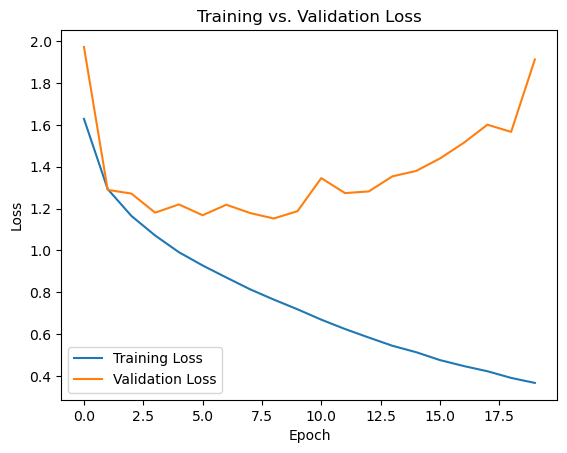

In [38]:
plt.plot(cnn_batchnorm_history.history['loss'], label='Training Loss')
plt.plot(cnn_batchnorm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

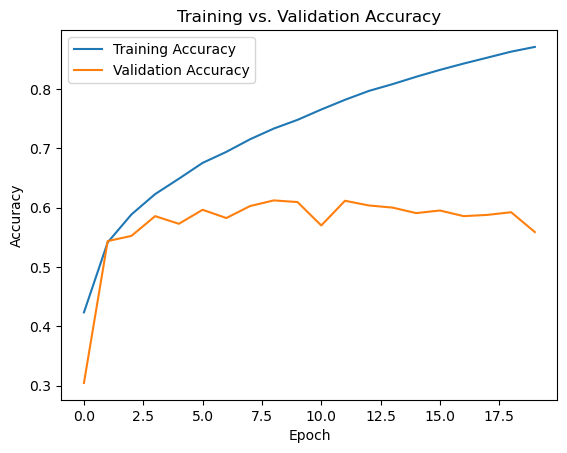

In [39]:
plt.plot(cnn_batchnorm_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_batchnorm_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()